<a name="top"></a>

# **Predict Sales: Neural Network & PyTorch** [[YouTube]](https://www.youtube.com/watch?v=SugVN2t3M8I)
<br>

[Notebook](https://colab.research.google.com/drive/14XsXF-8Jl67Rwb_ElnWCKwTLNZpx037h#scrollTo=9FhUIQHTMt2j)

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
from helpers import *
pd.options.display.float_format = '${:,.2f}'.format

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Establishing and checking device**

In [2]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('{} device is the current processing unit'.format(device))

if device=='cuda':
    print ("GPU is available: ", torch.cuda.get_device_(device=device))

cpu device is the current processing unit


<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**The Dataset**
* `Weekend`, `Sunny`, `Warm`, `BigSign` - One-hot encoded

In [3]:
url = 'https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv'
df = pd.read_csv(url)
df.columns = ['weekend', 'sunny', 'warm_weather', 'big_sign', 'price', 'total_sales']

head_tail_horz(df, 5, "Lemonade Sales")

,weekend,sunny,warm_weather,big_sign,price,total_sales
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
,weekend,sunny,warm_weather,big_sign,price,total_sales
360,0,1,1,1,7,0
361,0,0,1,1,8,0
362,1,0,0,1,9,71
363,0,0,1,1,10,0


In [23]:
df.shape

(365, 6)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Standardizing the values**
* range -1 to 1
* calculating the mean and standard deviation of `price`
* stardardizing the values in `price`
* calculating mean and standard deviation of `num_sold`
* stardardizing the values `num_sold`

In [4]:
price_avg = df.price.mean()
price_std = df.price.std()
df['price'] = (df['price'] - price_avg) / price_std

sales_avg = df.total_sales.mean()
sales_std = df.total_sales.std()
df['total_sales'] = (df['total_sales'] - sales_avg) / sales_std

In [5]:
head_tail_horz(df, 5, "Stardized Values")

,weekend,sunny,warm_weather,big_sign,price,total_sales
0,1,0,0,1,0.85,-0.02
1,1,1,1,0,1.45,0.74
2,0,1,0,0,1.45,-0.85
3,1,0,0,1,-0.97,0.39
4,1,0,0,1,0.24,0.08
,weekend,sunny,warm_weather,big_sign,price,total_sales
360,0,1,1,1,-0.37,-0.85
361,0,0,1,1,0.24,-0.85
362,1,0,0,1,0.85,-0.02
363,0,0,1,1,1.45,-0.85


<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Establishing input data and target data**
* Creating tensors for both groups

In [6]:
inputs =  ['weekend', 'sunny', 'warm_weather', 'big_sign', 'price']
input_data = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

outputs = ['total_sales']
target_data = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [7]:
input_data[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [8]:
target_data[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Building the neural network**
	
<font size = 4>VERY Basic Neural Network Architecture:
* Number of inputs: 5
* Number of outputs: 1
* Number of hidden neurons: 100
* Number of hidden layers: 1
* Activation function: ReLU

In [9]:
model = nn.Sequential(
            nn.Linear(5, 100),
			nn.ReLU(),
			nn.Linear(100, 1)
        )

model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Defining loss function and optimizer**

In [10]:
loss_function = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Training the neural network**

In [11]:
def train_model(model, epochs, input_data, target_data):
	
	loss_log = []
	
	for epoch in range(epochs):
		epoch_loss = 0
		
		for item in range(len(input_data)):
			prediction = model(input_data[item])
			loss = loss_function(prediction, target_data[item])
			
			epoch_loss += loss.item()
			
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
		
		loss_append = epoch_loss
		loss_log.append([epoch, float(loss_append)])
		if epoch > 0:
			if epoch % 25 == 0:
				print(f"Epoch {epoch}/{epochs} loss:\t{epoch_loss}")
	
	loss_df = pd.DataFrame(loss_log, columns = ["epoch", "loss"]).set_index("epoch")
	
	return loss_df

In [12]:
loss_df = train_model(model, 350, input_data, target_data)

Epoch 10/350 loss:	1.5571909384319458
Epoch 20/350 loss:	0.5863208042618169
Epoch 30/350 loss:	0.24277418241194226
Epoch 40/350 loss:	0.08789317101296934
Epoch 50/350 loss:	0.03218951146859883
Epoch 60/350 loss:	0.01473009477058751
Epoch 70/350 loss:	0.009291722111190115
Epoch 80/350 loss:	0.005546251554003234
Epoch 90/350 loss:	0.003758392960586665
Epoch 100/350 loss:	0.002415488048130715
Epoch 110/350 loss:	0.001774602894853372
Epoch 120/350 loss:	0.0013976288644570733
Epoch 130/350 loss:	0.0010741114149530606
Epoch 140/350 loss:	0.00081670589431607
Epoch 150/350 loss:	0.0006984547492463467
Epoch 160/350 loss:	0.000556560566687736
Epoch 170/350 loss:	0.00047097532408710285
Epoch 180/350 loss:	0.0003830859710083935
Epoch 190/350 loss:	0.0003360207007463978
Epoch 200/350 loss:	0.00028590525848826154
Epoch 210/350 loss:	0.0002454689320003922
Epoch 220/350 loss:	0.00021245907678713039
Epoch 230/350 loss:	0.0001857689169246779
Epoch 240/350 loss:	0.0001650265988502042
Epoch 250/350 loss:	

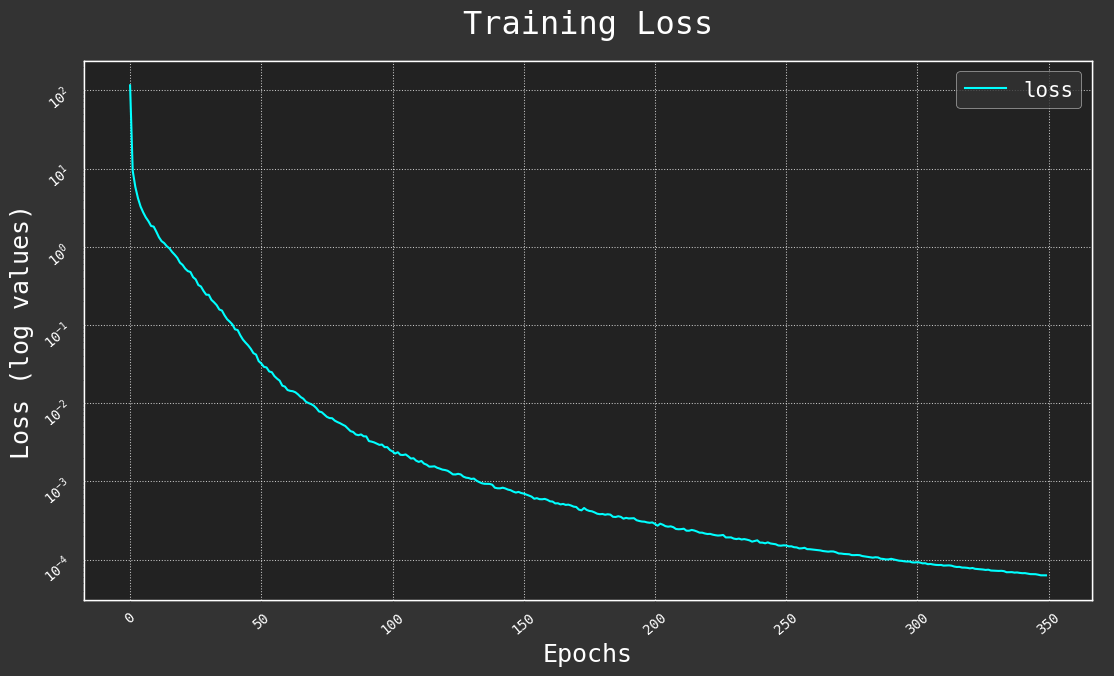

In [17]:
fancy_plot(loss_df, 
		   xlabel = "Epochs", 
		   ylabel = "Loss (log values)",
		   title = "Training Loss",
		   logy = True)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Analyze Model Performance

In [20]:
@torch.no_grad() 
def evaluate_mode(model, input_data, target_data, min_value, max_value):
    
    model.eval()
    
    predictions = []
    actuals = []
    
    input_data.to(device)
    target_data.to(device)
    model.to(device)
    
    for item in range(len(input_data)):
		# one forward pass
        prediction = model(input_data[item])                               

        # reversing normalization
        prediction = prediction * sales_std + sales_avg
        actual = target_data[item] * sales_std + sales_avg
        
        predictions.append(prediction.tolist())
        actuals.append(actual.item())
    
    plt.scatter(actuals, predictions)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.plot([min_value, max_value], [min_value, max_value]) 
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
 
    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

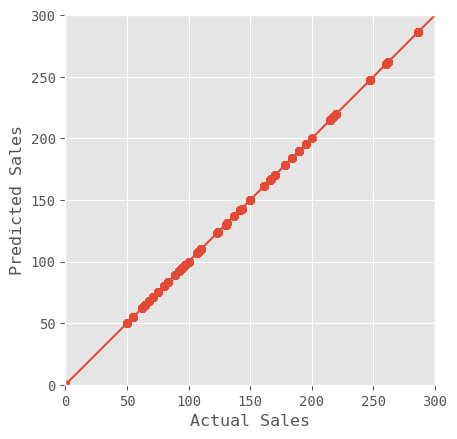

In [21]:
evaluate_mode(model, input_data, target_data, 0, 300)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Creating synthetic data to work with

In [24]:
# Below we use the synthetic data generator forumla to
# determine what the actual result should have been.
def dataset_creator(weekend, sunny, warm, big_sign, price):
	
    num_sold = 0
	
    if weekend:
        num_sold = (sunny * 5  + int(500 / price))
        if big_sign:
            num_sold = 1.3 * num_sold
        if warm:
            num_sold = 2 * num_sold
        if sunny:
            num_sold = 1.25 * num_sold
    num_sold = int(num_sold)    
    return num_sold

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

In [ ]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 0
warm = 0    
bigsign = 1
price = 5

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = dataset_creator(weekend, sunny, warm, bigsign, price) 

# Use the CPU as we just need to do a single pass
[TBD]

# Normalize our inputs using the same values for our training
price = [price - price_avg]

# Create our input tensor
input_01 = torch.tensor([TBD],dtype=float)

# Pass the input into the neural network
y1 = [TBD]

# Un-normalize our output y1
y1 = y1*numSoldStd+numSoldMean
   
# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<a name=''></a>

---

**Sections:**  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)

---

<span style = 'background-color: purple; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;'><font size = 4>label</font></span>

In [15]:
import_all()

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>Text